In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-classification-dataset-csv/emails.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [4]:
df = pd.read_csv("/kaggle/input/email-spam-classification-dataset-csv/emails.csv")

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [8]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

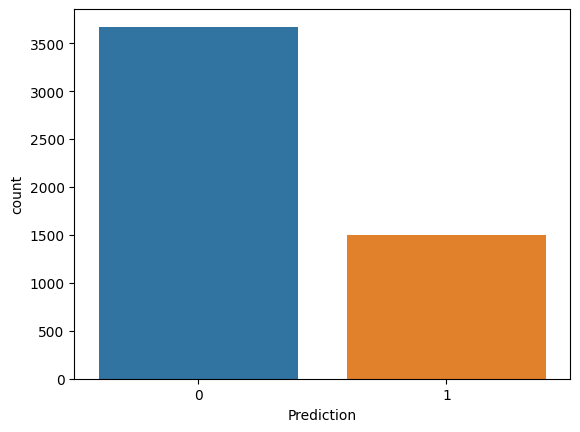

In [9]:
sns.countplot(data = df, x = "Prediction")
plt.show()

In [11]:
df = df.iloc[:, 1:]
df

,to,ect,and,for,of,a,you,hou,in,on,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,24,6,6,2,102,1,27,18,21,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,8,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3,5,22,0,5,1,51,2,10,1,5,...,0,0,0,0,0,0,0,0,0,0
4,6,17,1,5,2,57,0,9,3,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,0,32,0,0,5,6,...,0,0,0,0,0,0,0,0,0,0
5168,27,11,2,6,5,151,4,3,23,18,...,0,0,0,0,0,0,0,1,0,0
5169,0,1,1,0,0,11,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5170,7,1,0,2,1,28,2,0,8,11,...,0,0,0,0,0,0,0,1,0,1


In [12]:
X = df.iloc[:, :3000]
X

,to,ect,and,for,of,a,you,hou,in,on,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,24,6,6,2,102,1,27,18,21,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,8,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3,5,22,0,5,1,51,2,10,1,5,...,0,0,0,0,0,0,0,0,0,0
4,6,17,1,5,2,57,0,9,3,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,0,32,0,0,5,6,...,0,0,0,0,0,0,0,0,0,0
5168,27,11,2,6,5,151,4,3,23,18,...,0,0,0,0,0,0,0,1,0,0
5169,0,1,1,0,0,11,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5170,7,1,0,2,1,28,2,0,8,11,...,0,0,0,0,0,0,0,1,0,1


In [13]:
y = df.iloc[:, -1]
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [41]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

Using Logistic Regression

In [42]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Precision :  0.9767441860465116
Recall :  0.9788135593220338
Accuracy :  0.9864690721649485
F1 Score :  0.9777777777777777

[[1069   11]
 [  10  462]] 



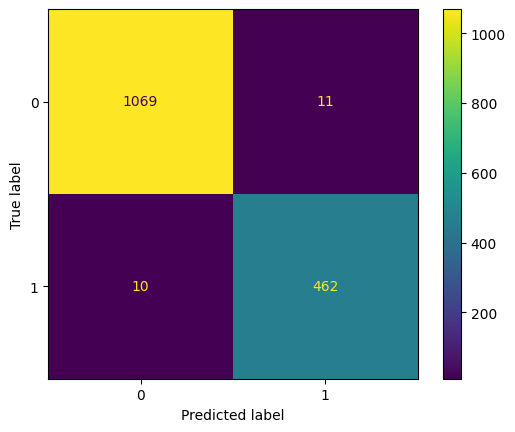

In [43]:
y_pred_LR = model_LR.predict(X_test)
perform(y_pred_LR)

In [44]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1080
           1       0.98      0.98      0.98       472

    accuracy                           0.99      1552
   macro avg       0.98      0.98      0.98      1552
weighted avg       0.99      0.99      0.99      1552



Using XGB Classifier

In [45]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[1080    0]
 [   0  472]] 



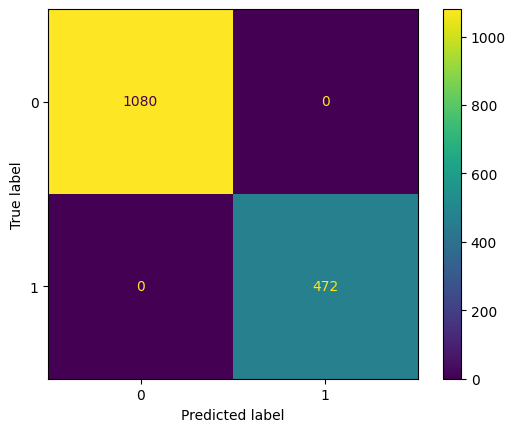

In [46]:
y_pred_XGB = model_XGB.predict(X_test)
perform(y_pred_XGB)

In [47]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1080
           1       1.00      1.00      1.00       472

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552



Using SVC

In [51]:
model_SVC = SVC()
model_SVC.fit(X_train, y_train)

SVC()

Precision :  0.8789473684210526
Recall :  0.3538135593220339
Accuracy :  0.788659793814433
F1 Score :  0.5045317220543807

[[1057   23]
 [ 305  167]] 



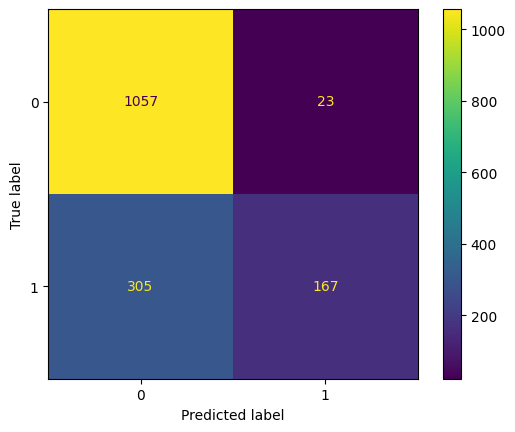

In [53]:
y_pred_SVC = model_SVC.predict(X_test)
perform(y_pred_SVC)

In [54]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1080
           1       0.88      0.35      0.50       472

    accuracy                           0.79      1552
   macro avg       0.83      0.67      0.69      1552
weighted avg       0.81      0.79      0.76      1552



Using Gaussian Naive Bayes

In [56]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

Precision :  0.9915254237288136
Recall :  0.9915254237288136
Accuracy :  0.9948453608247423
F1 Score :  0.9915254237288136

[[1076    4]
 [   4  468]] 



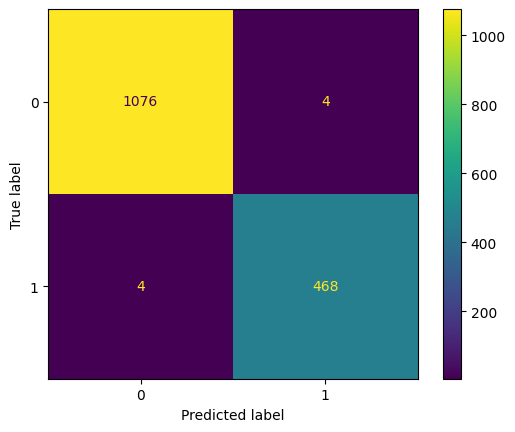

In [58]:
y_pred_NB = model_NB.predict(X_test)
perform(y_pred_NB)